In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')

In [77]:
FIG_PATH = "../src/imgs"
DROP_YEARS = range(1970, 1990)

In [78]:
df = pd.read_csv('../data/per_state_all.csv')
df.drop(columns=df.columns[0], axis=1, inplace=True)
df.head()

,Nível 1 - Setor,Nível 2,Nível 3,Nível 5,Gás,Estado,Atividade Econômica,1970,1971,1972,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,CO2e (t) GWP-AR2,SP,OUTRA_IND,1.925100e+06,1.896140e+06,2.401772e+06,...,40300.000000,40300.000000,40300.000000,40300.000000,40300.000000,40300.000000,40300.000000,40300.000000,40300.000000,40300.000000
1,Processos Industriais,Indústria Química,Produção de Ácido Nítrico,NaN,CO2e (t) GWP-AR2,BA,OUTRA_IND,0.000000e+00,0.000000e+00,0.000000e+00,...,13146.761156,12817.510091,13697.239462,13697.239462,13697.239462,13697.239462,13697.239462,13697.239462,13697.239462,13697.239462
2,Processos Industriais,Indústria Química,Produção de Ácido Nítrico,NaN,CO2e (t) GWP-AR2,RJ,OUTRA_IND,2.742924e+02,4.264659e+02,6.212139e+02,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,Processos Industriais,Indústria Química,Produção de Ácido Nítrico,NaN,CO2e (t) GWP-AR2,SP,OUTRA_IND,1.143251e+05,1.777510e+05,2.589220e+05,...,224146.845165,218533.250555,233532.272805,233532.272805,233532.272805,233532.272805,233532.272805,233532.272805,233532.272805,233532.272805
4,Processos Industriais,Indústria Química,Produção de Acrilonitrila,NaN,CO2e (t) GWP-AR2,BA,OUTRA_IND,0.000000e+00,0.000000e+00,0.000000e+00,...,22328.696280,22328.696280,22328.696280,22328.696280,22328.696280,22328.696280,22328.696280,22328.696280,22328.696280,22328.696280


In [79]:
df.shape

(32442, 59)

In [80]:
df.drop_duplicates(inplace=True)
df.shape

(32390, 59)

In [81]:
drop_years_list = list(DROP_YEARS)

drop_years_list = [str(year) for year in drop_years_list]

In [82]:
DROP_SECTORS = ['Nível 2', 'Nível 3', 'Nível 5', 'Gás','Atividade Econômica'] + drop_years_list
df_final = df.drop(columns=DROP_SECTORS)
df_final.head()

,Nível 1 - Setor,Estado,1990,1991,1992,1993,1994,1995,1996,1997,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Processos Industriais,SP,2.675300e+06,3.487500e+06,3.227100e+06,4.290400e+06,4.336900e+06,4.674800e+06,3.478200e+06,2.994600e+06,...,40300.000000,40300.000000,40300.000000,40300.000000,40300.000000,40300.000000,40300.000000,40300.000000,40300.000000,40300.000000
1,Processos Industriais,BA,3.820078e+04,4.055122e+04,3.953393e+04,4.164936e+04,4.167285e+04,4.231538e+04,4.291975e+04,4.414675e+04,...,13146.761156,12817.510091,13697.239462,13697.239462,13697.239462,13697.239462,13697.239462,13697.239462,13697.239462,13697.239462
2,Processos Industriais,RJ,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,Processos Industriais,SP,5.228992e+05,5.577488e+05,5.463661e+05,5.783506e+05,5.814272e+05,5.931846e+05,5.987802e+05,6.130533e+05,...,224146.845165,218533.250555,233532.272805,233532.272805,233532.272805,233532.272805,233532.272805,233532.272805,233532.272805,233532.272805
4,Processos Industriais,BA,1.842984e+04,1.499669e+04,1.752229e+04,1.754568e+04,1.808062e+04,1.886105e+04,1.853380e+04,2.057668e+04,...,22328.696280,22328.696280,22328.696280,22328.696280,22328.696280,22328.696280,22328.696280,22328.696280,22328.696280,22328.696280


In [83]:
SECTOR_TRANSLATION = {
    "Agropecuária": "Farming",
    "Processos Industriais": "Industry",
    "Energia": "Energy",
    "Resíduos": "Waste",
    "Mudança de Uso da Terra e Floresta": "Land-use change and Forestry"
}

In [84]:
df_final = df_final.replace(SECTOR_TRANSLATION)

In [85]:
df_final.to_csv("../data/sectors_state.csv")

In [86]:
df_state_sector = df_final.groupby(['Estado', 'Nível 1 - Setor'] ).sum()
df_state_sector

1990          1991          1992  \
Estado Nível 1 - Setor                                                          
AC     Energy                        9.773868e+05  1.134850e+06  1.314101e+06   
       Farming                       5.668646e+06  5.883166e+06  5.934656e+06   
       Land-use change and Forestry  8.569399e+07  1.005294e+08  1.090318e+08   
       Resíduos                      1.642888e+05  2.273956e+05  1.945387e+05   
AL     Energy                        3.184207e+06  3.866668e+06  3.975445e+06   
...                                           ...           ...           ...   
TO     Energy                        2.736422e+06  2.634126e+06  3.181242e+06   
       Farming                       6.496683e+07  6.760895e+07  7.102967e+07   
       Industry                      0.000000e+00  0.000000e+00  0.000000e+00   
       Land-use change and Forestry  2.034329e+08  1.803597e+08  2.344066e+08   
       Resíduos                      5.347011e+05  4.607009e+05  6.004375e+05   

                                             1993          1994          1995  \
Estado Nível 1 - Setor                                                          
AC     Energy                        1.499643e+06  1.571459e+06  1.900865e+06   
       Farming                       6.435450e+06  6.804700e+06  6.949523e+06   
       Land-use change and Forestry  1.037176e+08  1.613111e+08  1.452300e+08   
       Resíduos                      2.095731e+05  2.250283e+05  2.421810e+05   
AL     Energy                        4.170336e+06  5.150206e+06  4.789733e+06   
...                                           ...           ...           ...   
TO     Energy                        3.635684e+06  3.205122e+06  3.487781e+06   
       Farming                       7.663290e+07  7.904935e+07  8.200217e+07   
       Industry                      0.000000e+00  0.000000e+00  0.000000e+00   
       Land-use change and Forestry  1.954132e+08  1.721495e+08  2.377556e+08   
       Resíduos                      6.192415e+05  6.501296e+05  6.855124e+05   

                                             1996          1997          1998  \
Estado Nível 1 - Setor                                                          
AC     Energy                        2.354256e+06  2.713315e+06  2.767584e+06   
       Farming                       9.439073e+06  9.639814e+06  1.013522e+07   
       Land-use change and Forestry  1.344848e+08  1.203817e+08  1.122232e+08   
       Resíduos                      2.623203e+05  2.832645e+05  3.207052e+05   
AL     Energy                        4.801330e+06  4.946302e+06  5.471524e+06   
...                                           ...           ...           ...   
TO     Energy                        3.974959e+06  4.737876e+06  4.906610e+06   
       Farming                       7.788968e+07  7.839787e+07  8.097121e+07   
       Industry                      0.000000e+00  0.000000e+00  0.000000e+00   
       Land-use change and Forestry  1.798691e+08  1.661938e+08  1.345411e+08   
       Resíduos                      7.326581e+05  7.632262e+05  8.143138e+05   

                                             1999  ...          2012  \
Estado Nível 1 - Setor                             ...                 
AC     Energy                        3.315075e+06  ...  3.749480e+06   
       Farming                       1.058577e+07  ...  2.236229e+07   
       Land-use change and Forestry  1.491800e+08  ...  5.910465e+07   
       Resíduos                      3.492501e+05  ...  9.165588e+05   
AL     Energy                        6.493336e+06  ...  1.009966e+07   
...                                           ...  ...           ...   
TO     Energy                        4.491002e+06  ...  9.659207e+06   
       Farming                       8.538229e+07  ...  1.056802e+08   
       Industry                      0.000000e+00  ...  8.123844e+05   
       Land-use change and Forestry  1.549726e+08  ...  1.099621e+08   
       Resíduos    

In [87]:
# df_co2_state.columns = [int(year) for year in df_co2_state.columns]

df_state_sector.columns = pd.to_datetime(df_state_sector.T.index)

In [88]:
NE = ['PB', 'PE', 'RN', 'CE', 'AL','SE', 'MA', 'BA', 'PI']
SE = ['SP', 'RJ', 'MG', 'ES']
SUL = ['RS', 'SC', 'PR']
CO = ['MT', 'MS', 'DF', 'GO']
NO = ['AM', 'PA', 'AC', 'RO', 'RR', 'TO', 'AP']

macrorregioes = {'Northeast': NE, 'Southeast': SE, 'South': SUL, 'Center-west': CO, 'North': NO}

In [89]:
KEY_STATES = SUL + ['MA','PA']

#### EMISSIONS PER STATE PER REGION

In [94]:
def plot_per_state(df):
    for state in KEY_STATES:
        fig, ax = plt.subplots(figsize=(12,8))
        df.loc[state].T.plot(ax=ax)
        ax.set_title(f"CO2 emissions per sector in {state}")
        ax.set_xlabel('Year')
        ax.set_ylabel('CO2 emissions in t')
        ax.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
        plt.savefig(FIG_PATH + f"/{state}", bbox_inches='tight')
        plt.show()

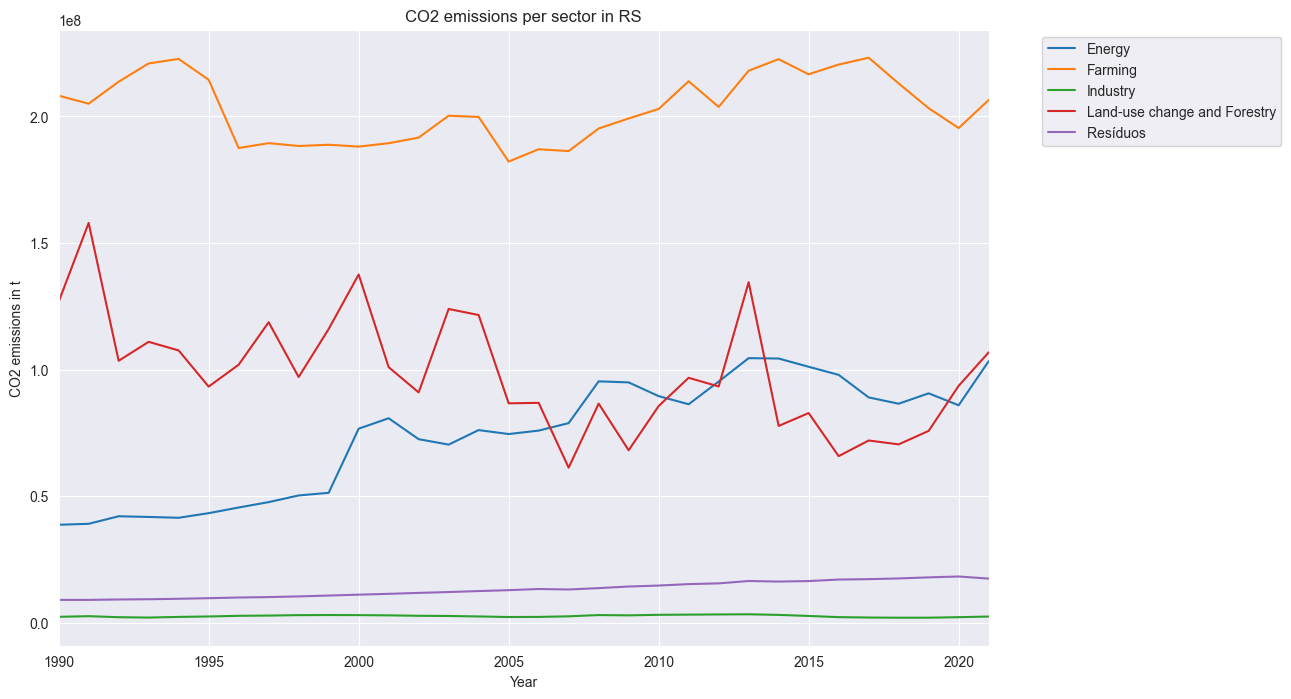

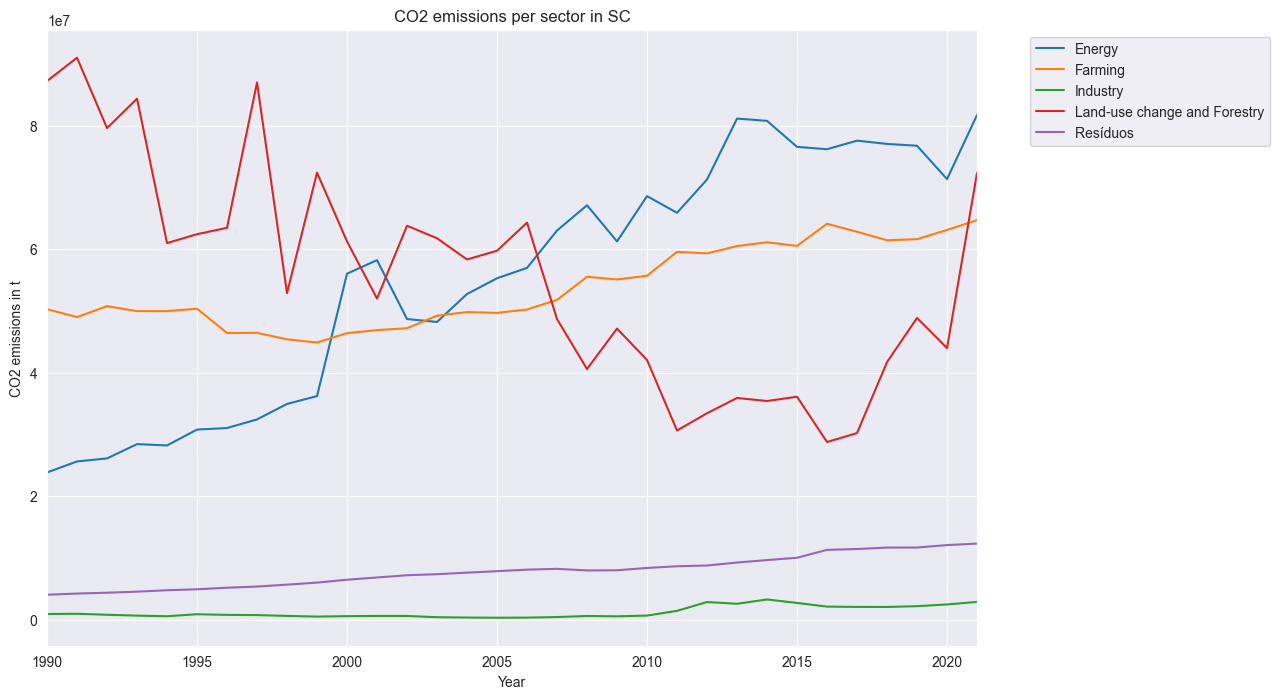

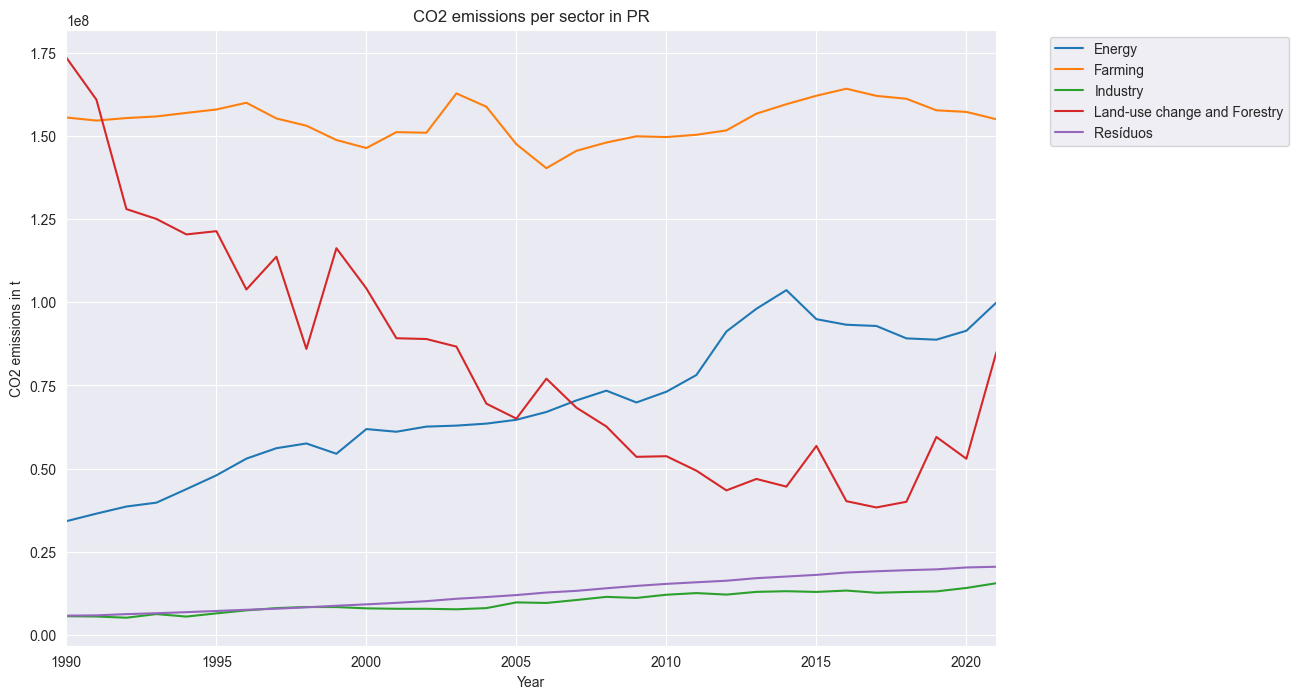

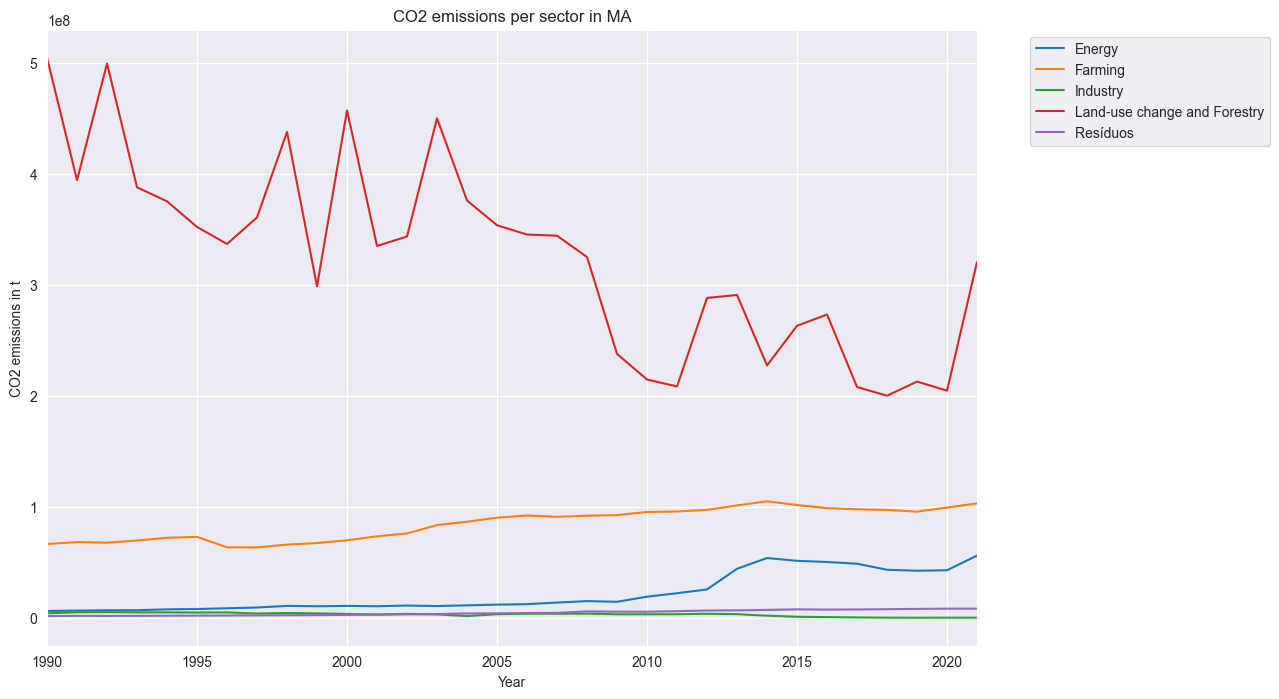

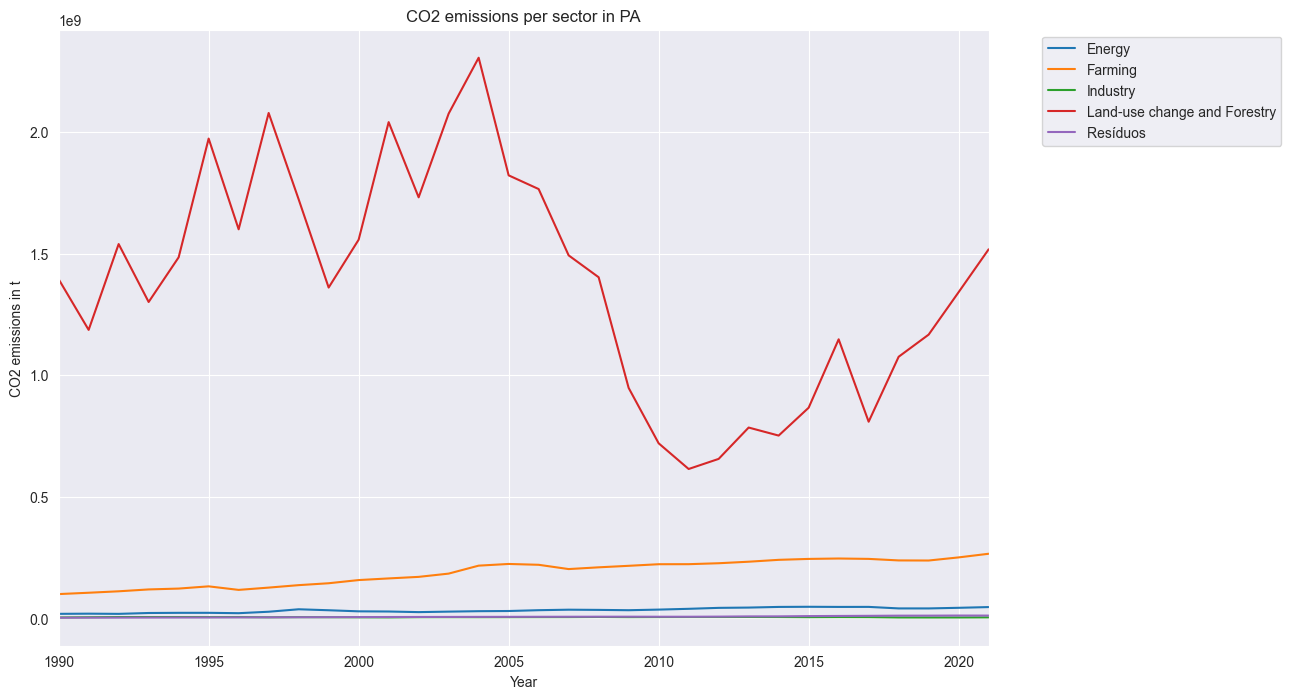

In [95]:
plot_per_state(df_state_sector)

## SECTORS

In [92]:
df_sectors = df_final.groupby('Nível 1 - Setor').sum()
df_sectors

C:\Users\danic\AppData\Local\Temp\ipykernel_10048\1965798088.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_sectors = df_final.groupby('Nível 1 - Setor').sum()


,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
Nível 1 - Setor,,,,,,,,,,,,,,,,,,,,,
Energy,5.226626e+08,5.611192e+08,5.793266e+08,5.959974e+08,6.196745e+08,6.747633e+08,7.299305e+08,7.726257e+08,8.353863e+08,8.333333e+08,...,1.501109e+09,1.624907e+09,1.719973e+09,1.629126e+09,1.514575e+09,1.529170e+09,1.440269e+09,1.451450e+09,1.386435e+09,1.571603e+09
Farming,2.417900e+09,2.478471e+09,2.527882e+09,2.538495e+09,2.609227e+09,2.630140e+09,2.509676e+09,2.542673e+09,2.563181e+09,2.597608e+09,...,3.037943e+09,3.078013e+09,3.132411e+09,3.128905e+09,3.149760e+09,3.116334e+09,3.057599e+09,3.014684e+09,3.072755e+09,3.160254e+09
Industry,1.708312e+08,1.960973e+08,1.892665e+08,1.995096e+08,1.987281e+08,2.053174e+08,1.976015e+08,2.110051e+08,2.298591e+08,2.186324e+08,...,2.894592e+08,2.910799e+08,2.611947e+08,2.554963e+08,2.359440e+08,2.378493e+08,2.394045e+08,2.323987e+08,2.331859e+08,2.569646e+08
Land-use change and Forestry,5.452559e+09,5.399734e+09,6.191554e+09,5.560356e+09,6.467848e+09,7.636151e+09,6.435174e+09,6.728761e+09,6.262331e+09,6.159051e+09,...,2.895174e+09,3.368065e+09,3.002777e+09,3.522416e+09,3.680892e+09,3.058377e+09,3.308228e+09,3.918268e+09,3.992290e+09,4.731844e+09
Resíduos,1.089387e+08,1.136534e+08,1.183269e+08,1.234200e+08,1.295575e+08,1.363558e+08,1.440201e+08,1.509710e+08,1.592020e+08,1.684825e+08,...,2.647403e+08,2.809831e+08,2.893127e+08,2.984452e+08,3.045650e+08,3.104634e+08,3.203206e+08,3.250899e+08,3.308404e+08,3.304813e+08


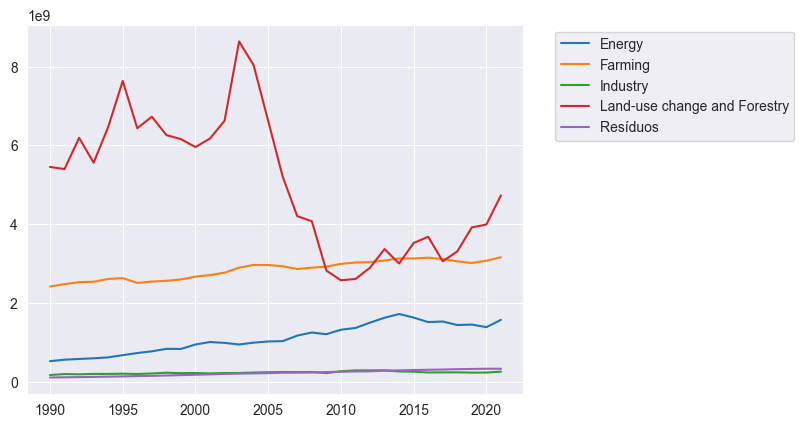

In [96]:
df_sectors.T.plot()
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')